## MATH 151 Lab 7

Put team members' names and section number here.

In [76]:
import sympy as sp
from sympy import *
from sympy.plotting import (plot,plot_parametric)

x, y, t = symbols("x y t")

### Question 1

#### 1a

In [77]:
# t=0, board 1 is full red
# blue squares grow x^2
# t=4 board 1 is full blue

# t=0, board 2 is full blue
# red squares grow 4x
# t=4 board 2 is full blue

n = 4

r = 4 * t + n**2 - t ** 2
b = t ** 2 + n**2 - 4 * t

display(simplify(r + b))

32

#### 1b

In [78]:
d = r - b
roots = solve(d, t)
print(f"D(t) = {d}")
print(f"The roots of D(t) are {str(roots).strip('[]')}")
print(f"D(8) is {d.subs(t, 8)}")


D(t) = -2*t**2 + 8*t
The roots of D(t) are 0, 4
D(8) is -64


#### 1c

In [79]:
print(f"Yes thre is a time where there is more blue squares")
print(f"As at D(8) < 0 which means more blue squares are present at that time")

Yes thre is a time where there is more blue squares
As at D(8) < 0 which means more blue squares are present at that time


1d

In [80]:
db = diff(b)
squares = solve(db, t)
print(f"B'(t) = {db}")
print(f"B'(t) = 0, t = {squares[0]}")
print("The amount of blue squares is at a minimum, \nas the slope is zero and the derivative goes from negative to postive values")


B'(t) = 2*t - 4
B'(t) = 0, t = 2
The amount of blue squares is at a minimum, 
as the slope is zero and the derivative goes from negative to postive values


1e

In [81]:
print(f"The minimum amount of blue squares is {b.subs(t, 2)}")


The minimum amount of blue squares is 12


### Question 2

#### 2a

In [82]:
g1 = cos(x)
g2 = x * ln(x + 1) + 1
g3 = sqrt(x - 2) + 1

print(f"g(x) is discontinouous at x = 3 because\nlim g(x) as x->3- is {g2.subs(x, 3).evalf():.1f} and the lim g(x) as x->3+ is {g3.subs(x, 3).evalf():.1f}")
print(f"On the interval (-1, 4), g(x) is not differentiable at x = 3\nas the function is not continous at that point")

g(x) is discontinouous at x = 3 because
lim g(x) as x->3- is 5.2 and the lim g(x) as x->3+ is 2.0
On the interval (-1, 4), g(x) is not differentiable at x = 3
as the function is not continous at that point


#### 2b

In [83]:
print(f"g(x) fails the mean value theorem as there is a jump discontinuity at x = 3")

x0 = -1
xf = 4

slope = ((g3.subs(x, xf) - g1.subs(x, x0)) / (xf - x0))

# finding which part of g(x) contains slope
x_values = [
    nsolve(diff(g1) - slope, x, 0),
    nsolve(diff(g2) - slope, x, 0),
    nsolve(diff(g3) - slope, x, 4)
]

x_values = [ x for x in x_values if x < xf and x > x0]
print(f"c = {str(x_values).strip('[]')}")


g(x) fails the mean value theorem as there is a jump discontinuity at x = 3
c = -0.384161895823078, 0.217057538126372, 3.77984415766695


#### 2c

In [84]:
critical = {
    nsolve(diff(g1), x, 0),
    nsolve(diff(g2), x, 0),
    # nsolve(diff(g3), x, 3) non real solution
}

critical_x = [ x for x in critical if x < xf and x > x0]
print(f"Critical values of g(x) are x = {str(critical_x).strip('[]')}, 3, with g(0) = {g1.subs(x, 0)} and g(3) = {g3.subs(x, 3)}")


Critical values of g(x) are x = 0, 3, with g(0) = 1 and g(3) = 2


#### 2d

In [92]:
print("Critial values = 1, 2")
print(f"Bounds = {g1.subs(x, x0).evalf(3)}, {g3.subs(x, xf).evalf(3)}")

print(f"There is an absolute minimum at x = -1,\nwith the absolute maximum not existing due to the interval being open at x = 3")

Critial values = 1, 2
Bounds = 0.540, 2.41
There is an absolute minimum at x = -1,
with the absolute maximum not existing due to the interval being open at x = 3


#### 2e

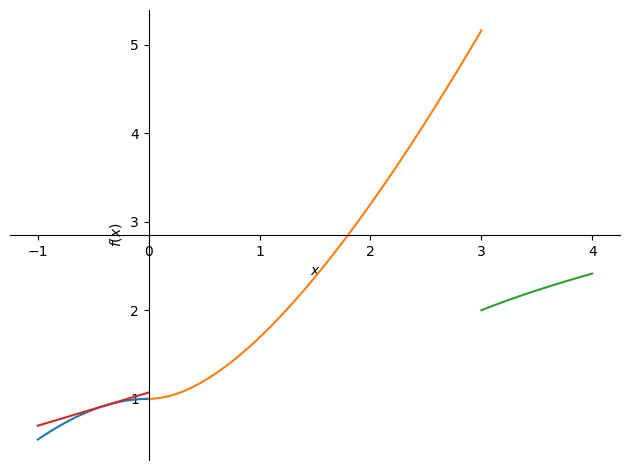

In [87]:
piece1 = plot(g1, (x, -1, 0), show=False)
piece2 = plot(g2, (x, 0, 3), show=False)
piece3 = plot(g3, (x, 3, 4), show=False)
tangent = plot(slope * (x - x_values[0]) + g1.subs(x, x_values[0]), (x, -1, 0), show=False)
piece1.extend(piece2)
piece1.extend(piece3)
piece1.extend(tangent)
piece1.show()
